Kaggle Dataset - https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data

Required files
- zomato.csv
- Country-Code.xlsx

Zomato is a restaurant search and discovery service founded in 2008 by Indian entrepreneurs Deepinder Goyal and Pankaj Chaddah. Zomato provides information, menus, and user reviews of restaurants as well as food delivery options from partner restaurants in select cities. It currently operates in 23 countries. The dataset has all restaurants & eateries currently under its purview.

### Importing the Libraries

In [340]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [341]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [342]:
# read the dataframe

df = pd.read_csv("zomato.csv", encoding="latin-1")

In [343]:
df_country = pd.read_excel("Country-Code.xlsx")

### Inspecting the dataframe

In [344]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [345]:
df.shape

(9551, 21)

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Data dictionary**

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant's location
- Latitude: Latitude coordinate of the restaurant's location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies 
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

In [347]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [348]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [349]:
df_country.shape

(15, 2)

### Data analysis

- Missing values
- Numerical variable exploration
- Categorical variable exploration
- Finding relationship between features

### Missing values

In [350]:
# Null values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [351]:
# List comprehension

[feature for feature in df.columns if df[feature].isnull().sum()>1]

['Cuisines']

<AxesSubplot:>

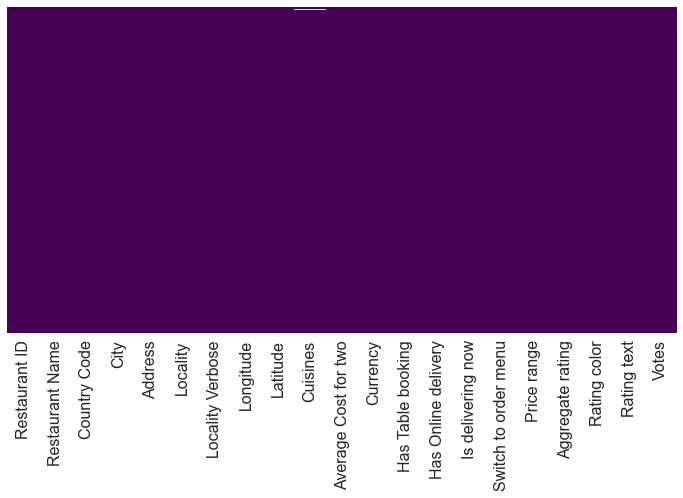

In [352]:
# Heat map

sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [353]:
df_country.isnull().sum()

Country Code    0
Country         0
dtype: int64

- There are 9 missing values in Cuisines column

### Data merging

In [354]:
# Merging the dataframes

final_df = df.merge(df_country, on="Country Code", how="left")

In [355]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [356]:
final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [357]:
# Check data types

final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [358]:
final_df[final_df.Cuisines.isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,No,No,No,No,1,3.9,Yellow,Good,160,United States
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,No,No,No,No,3,3.9,Yellow,Good,209,United States
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,No,No,No,No,3,3.8,Yellow,Good,102,United States
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,No,No,No,No,1,3.4,Orange,Average,11,United States
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,No,No,No,No,3,4.4,Green,Very Good,1158,United States
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,No,No,No,No,1,3.9,Yellow,Good,309,United States


There are multiple ways to deal with missing values. A few of the methods that we can use to populate the missing values are as follows:

- Fill up the missing values with the most commonly occuring value in the column (mode)
- Fill in values based on what would make more sense per the domain of the data in consideration (Verify with Subject Matter Expert)
- Remove the rows if the percentage of missing values is negligible to your analysis

In [359]:
final_df[final_df.Country == "United States"]["Cuisines"].value_counts()

Mexican                          25
American                         16
BBQ                               9
Chinese                           9
Seafood                           8
                                 ..
Desserts, Pizza, Ice Cream        1
International, Pizza              1
Breakfast, Pizza                  1
American, Burger, Pizza, Cafe     1
Burger, Greek, Sandwich           1
Name: Cuisines, Length: 229, dtype: int64

In [360]:
final_df[final_df.Country == "United States"]["Cuisines"].mode()[0]

'Mexican'

In [361]:
final_df.Cuisines.fillna("Mexican", inplace=True)

In [362]:
final_df[final_df.Cuisines.isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


In [363]:
final_df[final_df.Country == "United States"]["Cuisines"].value_counts()

Mexican                          34
American                         16
BBQ                               9
Chinese                           9
Seafood                           8
                                 ..
Desserts, Pizza, Ice Cream        1
International, Pizza              1
Breakfast, Pizza                  1
American, Burger, Pizza, Cafe     1
Burger, Greek, Sandwich           1
Name: Cuisines, Length: 229, dtype: int64

In [364]:
# check duplicates

final_df["Restaurant ID"].duplicated().sum()

0

In [365]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Univariate and bivariate analysis

In [366]:
# Zomato's presence around the world
# Country distribution

100 * final_df.Country.value_counts(normalize=True)

India             90.587373
United States      4.544027
United Kingdom     0.837609
Brazil             0.628206
UAE                0.628206
South Africa       0.628206
New Zealand        0.418804
Turkey             0.355984
Australia          0.251283
Phillipines        0.230342
Indonesia          0.219872
Singapore          0.209402
Qatar              0.209402
Sri Lanka          0.209402
Canada             0.041880
Name: Country, dtype: float64

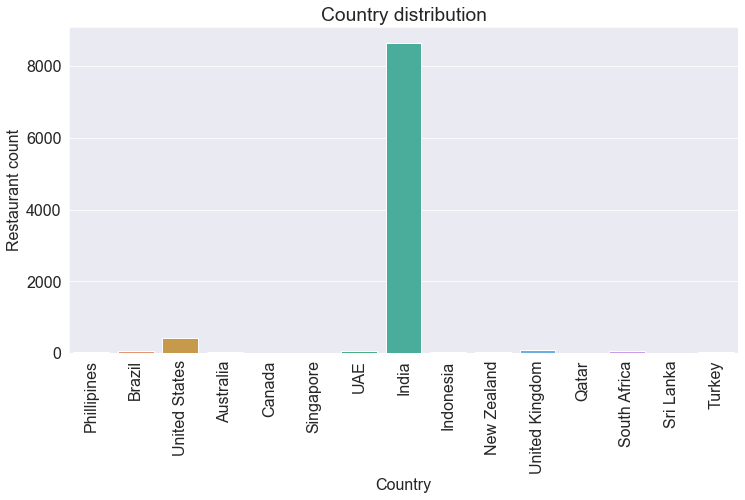

In [367]:
sns.countplot(data=final_df, x=final_df.Country)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Restaurant count')
plt.title('Country distribution')
plt.show()

In [368]:
len(final_df.Country.value_counts())

15

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Zomato service is available in 15 countries
- Top 3 countries with major business are India, United States and United Kingdom
- Zomato has more than 90% of the total restaurants in India. It makes sense as it's an Indian startup and hence has maximum business in Indian cities


</div>

In [369]:
# city distribution

100* final_df.City.value_counts(normalize=True).head(10)

New Delhi       57.302900
Gurgaon         11.705581
Noida           11.307716
Faridabad        2.627997
Ghaziabad        0.261753
Bhubaneshwar     0.219872
Amritsar         0.219872
Ahmedabad        0.219872
Lucknow          0.219872
Guwahati         0.219872
Name: City, dtype: float64

In [370]:
100* final_df.City.value_counts(normalize=True).tail(10)

Ojo Caliente        0.01047
Montville           0.01047
Monroe              0.01047
Miller              0.01047
Middleton Beach     0.01047
Panchkula           0.01047
Mc Millan           0.01047
Mayfield            0.01047
Macedon             0.01047
Vineland Station    0.01047
Name: City, dtype: float64

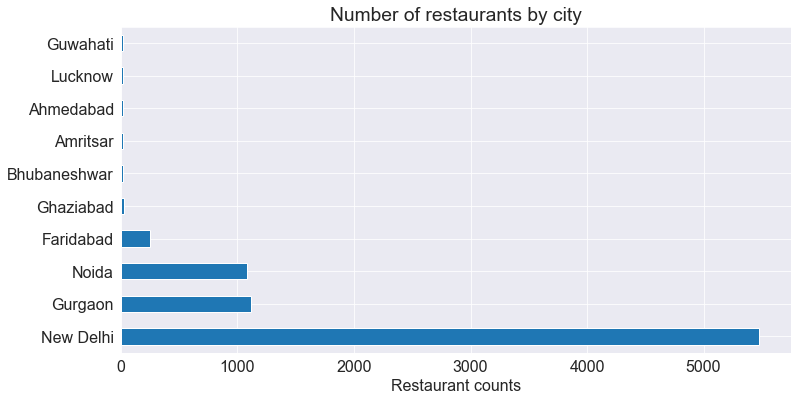

In [371]:
final_df.City.value_counts().nlargest(10).plot(kind='barh')
plt.title("Number of restaurants by city")
plt.xlabel("Restaurant counts")
plt.show()

In [372]:
# city distribution per country

final_df.groupby(['Country'])['City'].nunique().sort_values(ascending=False)

Country
India             43
United States     35
Australia         23
Phillipines        9
South Africa       6
Canada             4
Indonesia          4
United Kingdom     4
Brazil             3
UAE                3
New Zealand        2
Turkey             2
Qatar              1
Singapore          1
Sri Lanka          1
Name: City, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- 57% of the restaurants are from Delhi in India
- Highest number of restaurants are from the North Indian cities
- Zomato is available in 43 cities in India, 35 cities in United States and 23 cities in Australia
- Top 3 countries with majorority of restaurants are India, United States and United Kingdom. Zomato services are avalable in only 4 cities in United Kingdom

</div>

In [373]:
# Locality distribution

100* final_df.Locality.value_counts(normalize=True).head(10)

Connaught Place        1.277353
Rajouri Garden         1.036541
Shahdara               0.910899
Defence Colony         0.900429
Malviya Nagar          0.889959
Pitampura              0.889959
Mayur Vihar Phase 1    0.879489
Rajinder Nagar         0.848079
Safdarjung             0.837609
Satyaniketan           0.827139
Name: Locality, dtype: float64

In [374]:
final_df[["City", "Locality"]].groupby(["City", "Locality"]).size().reset_index().rename(columns={0:"Restaurant counts"}).sort_values(by="Restaurant counts").tail(10)

,City,Locality,Restaurant counts
870,New Delhi,Satyaniketan,79
864,New Delhi,Safdarjung,80
859,New Delhi,Rajinder Nagar,81
807,New Delhi,Malviya Nagar,84
812,New Delhi,Mayur Vihar Phase 1,84
846,New Delhi,Pitampura,85
725,New Delhi,Defence Colony,86
873,New Delhi,Shahdara,87
860,New Delhi,Rajouri Garden,99
712,New Delhi,Connaught Place,122


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- New Delhi in India has the highest number of restaurants 
- Highest number of resturants are observed in Connaught Place

</div>

In [375]:
# Cuisine distribution

100* final_df.Cuisines.value_counts(normalize=True).head(10)

North Indian                      9.800021
North Indian, Chinese             5.350225
Chinese                           3.706418
Fast Food                         3.706418
North Indian, Mughlai             3.497016
Cafe                              3.130562
Bakery                            2.282484
North Indian, Mughlai, Chinese    2.062611
Bakery, Desserts                  1.779918
Street Food                       1.560046
Name: Cuisines, dtype: float64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- North Indian, Chinese and Fast Food are the most popular cuisines

</div>

In [376]:
# Average Cost for two distribution

100* final_df["Average Cost for two"].value_counts(normalize=True)

500       9.423097
300       9.391687
400       8.972882
200       7.192964
600       6.826510
            ...   
8000      0.010470
2350      0.010470
150000    0.010470
70000     0.010470
545       0.010470
Name: Average Cost for two, Length: 140, dtype: float64

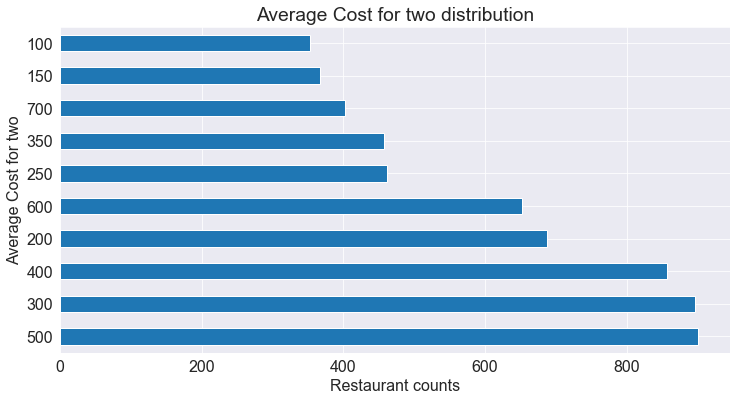

In [377]:
final_df["Average Cost for two"].value_counts().nlargest(10).plot(kind='barh')
plt.title("Average Cost for two distribution")
plt.xlabel("Restaurant counts")
plt.ylabel("Average Cost for two")
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Popular price range for Average Cost for two are 300 and 500 in their respective countries

</div>

In [378]:
# top 10 expensive restaurants

final_df[["Restaurant Name","Country", "City", "Average Cost for two"]].sort_values(by="Average Cost for two", ascending=False).head(10)

,Restaurant Name,Country,City,Average Cost for two
9284,Satoo - Hotel Shangri-La,Indonesia,Jakarta,800000
9283,Skye,Indonesia,Jakarta,800000
9287,Sushi Masa,Indonesia,Jakarta,500000
9289,3 Wise Monkeys,Indonesia,Jakarta,450000
9294,Avec Moi Restaurant and Bar,Indonesia,Jakarta,350000
9295,Onokabe,Indonesia,Tangerang,300000
9288,Lucky Cat Coffee & Kitchen,Indonesia,Jakarta,300000
9278,Lemongrass,Indonesia,Bogor,250000
9285,MONKS,Indonesia,Jakarta,250000
9296,Talaga Sampireun,Indonesia,Tangerang,200000


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Indonesia has the most expensive restaurants

</div>

In [379]:
final_df.groupby('Country')['Average Cost for two'].mean().sort_values(ascending =False)

Country
Indonesia         281190.476190
Sri Lanka           2375.000000
Phillipines         1606.818182
India                623.370319
South Africa         419.733333
Qatar                223.750000
UAE                  166.416667
Singapore            155.750000
Brazil               134.666667
Turkey                84.852941
New Zealand           69.750000
United Kingdom        47.812500
Canada                36.250000
United States         26.152074
Australia             24.083333
Name: Average Cost for two, dtype: float64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Indonesia has the most expensive restaurants followed by Sri Lanka
- United States and Australia have the cheapest restaurants

</div>

In [380]:
# top 10 expensive restaurants in India

temp_df = final_df[final_df.Country == "India"]
temp_df[["Restaurant Name","Country", "City", "Average Cost for two"]].sort_values(by="Average Cost for two", ascending=False).head(10)

,Restaurant Name,Country,City,Average Cost for two
7543,Orient Express - Taj Palace Hotel,India,New Delhi,8000
4088,Tian - Asian Cuisine Studio - ITC Maurya,India,New Delhi,7000
4087,Bukhara - ITC Maurya,India,New Delhi,6500
7499,The Spice Route - The Imperial,India,New Delhi,6000
7492,Nostalgia at 1911 Brasserie - The Imperial,India,New Delhi,6000
7494,1911 - The Imperial,India,New Delhi,6000
7538,Wasabi by Morimoto - The Taj Mahal Hotel,India,New Delhi,6000
7522,MEGU - The Leela Palace,India,New Delhi,5500
7539,House of Ming - The Taj Mahal Hotel,India,New Delhi,5500
7512,24/7 Restaurant - The Lalit New Delhi,India,New Delhi,5100


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- New Delhi has the most expensive restaurants in India

</div>

In [381]:
temp_df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head()

City
Panchkula    2000.000000
Hyderabad    1361.111111
Pune         1337.500000
Jaipur       1310.000000
Kolkata      1272.500000
Name: Average Cost for two, dtype: float64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Panchkula, Hyderabad and Pune cities have the highest average cost for two in India

</div>

In [382]:
temp_df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).tail()

City
Noida        539.490741
Allahabad    517.500000
Varanasi     505.000000
Amritsar     480.952381
Faridabad    447.609562
Name: Average Cost for two, dtype: float64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Varanasi, Amritsar and Faridabad cities have the lowest average cost for two in India

</div>

In [405]:
# currency used in each country 

final_df[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


In [383]:
# currency used in each country and the number of restaurants in each country

final_df[["Country","Currency"]].groupby(["Country","Currency"]).size().reset_index().rename(columns={0:"Restaurant count"}).sort_values(by="Restaurant count", ascending=False)

,Country,Currency,Restaurant count
3,India,Indian Rupees(Rs.),8652
14,United States,Dollar($),434
13,United Kingdom,Pounds(£),80
1,Brazil,Brazilian Real(R$),60
9,South Africa,Rand(R),60
12,UAE,Emirati Diram(AED),60
5,New Zealand,NewZealand($),40
11,Turkey,Turkish Lira(TL),34
0,Australia,Dollar($),24
6,Phillipines,Botswana Pula(P),22


In [384]:
# Online delivery distribution

100*final_df["Has Online delivery"].value_counts(normalize=True)

No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64

In [385]:
# which countries deliver online

final_df[final_df["Has Online delivery"] =='Yes']["Country"].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [386]:
# Restaurant counts in each country which deliver online

final_df[["Has Online delivery","Country"]].groupby(["Has Online delivery","Country"]).size()

Has Online delivery  Country       
No                   Australia           24
                     Brazil              60
                     Canada               4
                     India             6229
                     Indonesia           21
                     New Zealand         40
                     Phillipines         22
                     Qatar               20
                     Singapore           20
                     South Africa        60
                     Sri Lanka           20
                     Turkey              34
                     UAE                 32
                     United Kingdom      80
                     United States      434
Yes                  India             2423
                     UAE                 28
dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Online deliveries are available in India and UAE
- 74% of the restaurants do not deliver online

</div>

In [387]:
# table booking distribution

100*final_df["Has Table booking"].value_counts(normalize=True)

No     87.875615
Yes    12.124385
Name: Has Table booking, dtype: float64

In [388]:
# how many resturants have table booking

final_df[final_df["Has Table booking"] =='Yes']["Country"].value_counts()

India             1111
UAE                 18
Phillipines         14
United Kingdom      12
South Africa         2
Qatar                1
Name: Country, dtype: int64

In [389]:
# Restaurant counts in each country which has table booking option

final_df[["Has Table booking","Country"]].groupby(["Has Table booking","Country"]).size()

Has Table booking  Country       
No                 Australia           24
                   Brazil              60
                   Canada               4
                   India             7541
                   Indonesia           21
                   New Zealand         40
                   Phillipines          8
                   Qatar               19
                   Singapore           20
                   South Africa        58
                   Sri Lanka           20
                   Turkey              34
                   UAE                 42
                   United Kingdom      68
                   United States      434
Yes                India             1111
                   Phillipines         14
                   Qatar                1
                   South Africa         2
                   UAE                 18
                   United Kingdom      12
dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Table booking service is available in India, Qatar, UAE, Phillipines, South Africa and United Kingdom

</div>

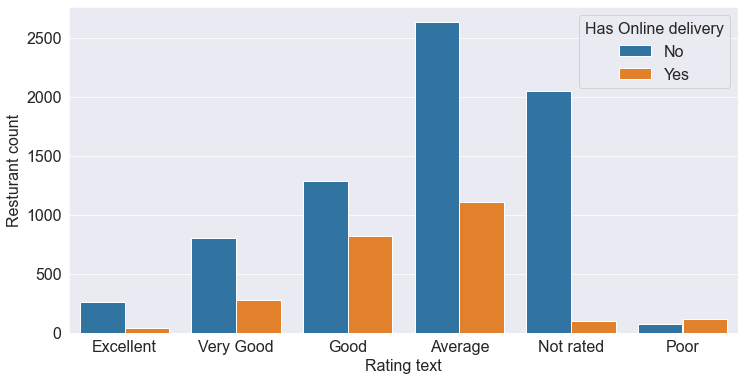

In [409]:
# Does online booking impact the rating?

sns.countplot(x = final_df["Rating text"], hue = final_df["Has Online delivery"])
plt.ylabel("Resturant count")
plt.show()

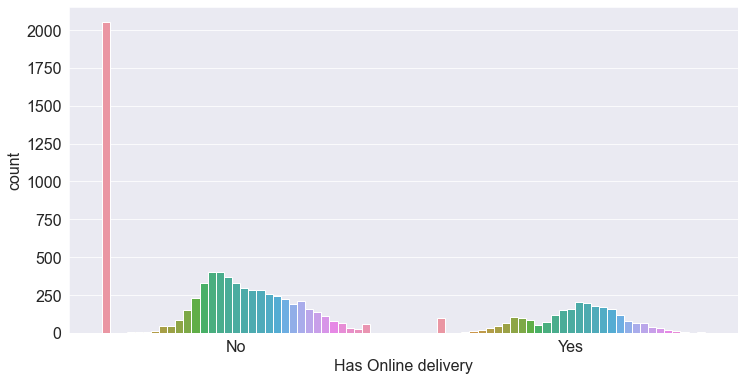

In [392]:
sns.countplot(hue = final_df["Aggregate rating"], x = final_df["Has Online delivery"])
plt.legend([],[], frameon=False)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Restaurants with excellent, very good, good and average ratings have more ratings when even if the online delivery facility was not available in the restaurant.
- Having online delivery option has no impact on ratings. 
- Higher number of restaurants with online delivery option were rated poor. Quality may have been compromised for these restaurants

</div>

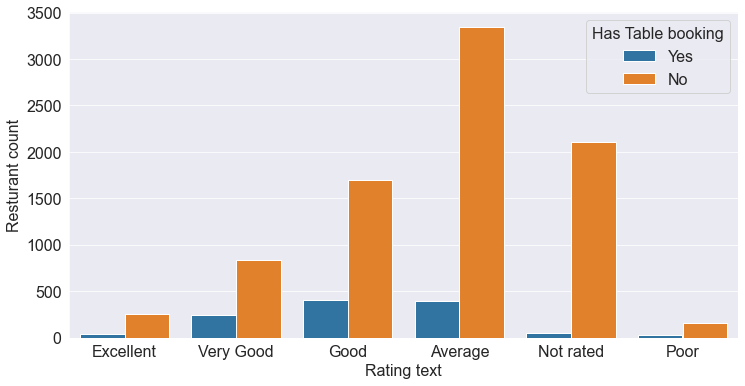

In [410]:
# Does online booking impact the rating?

sns.countplot(x = final_df["Rating text"], hue = final_df["Has Table booking"])
plt.ylabel("Resturant count")
plt.show()

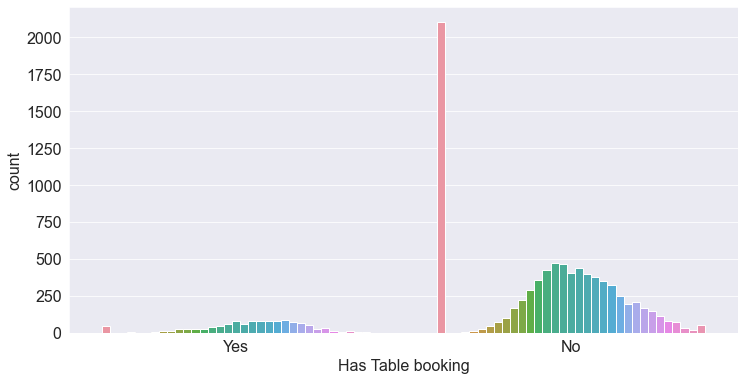

In [411]:
sns.countplot(hue = final_df["Aggregate rating"], x = final_df["Has Table booking"])
plt.legend([],[], frameon=False)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- The restaurants which do not have table booking facility tends to have higher ratings as compared to the restaurants which do have table booking facility available with them. 
- Table booking facility does not impact ratings.

</div>

In [394]:
# Price range distribution
100*final_df["Price range"].value_counts(normalize=True)

1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64

**Assumption**

- Price range of 1 -> low prices
- Price range of 2 -> Average prices
- Price range of 3 -> high prices
- Price range of 4 -> exorbitant prices

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- 46% of the restaurants have low price rates

</div>

In [395]:
# Votes distribution
# Number of ratings casted by customers

final_df.groupby("Country")["Votes"].sum().sort_values(ascending = False)

Country
India             1187163
United States      185848
UAE                 29611
South Africa        18910
United Kingdom      16439
Indonesia           16214
Turkey              14670
New Zealand          9721
Phillipines          8963
Qatar                3276
Sri Lanka            2929
Australia            2674
Brazil               1177
Singapore             638
Canada                412
Name: Votes, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Indian customer base is the highest and hence Indian customers have rated the most

</div>

In [396]:
# restaurants with outlets

final_df["Restaurant Name"].value_counts().head()

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: Restaurant Name, dtype: int64

Text(0.5, 1.0, 'Top 10 biggest restaurant chain ')

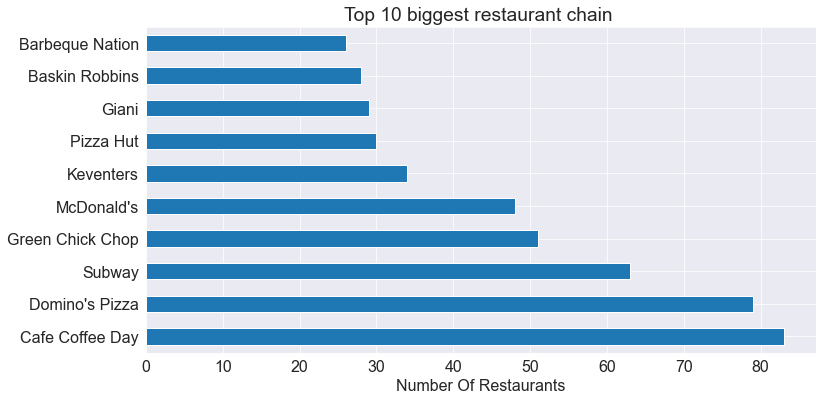

In [397]:
final_df["Restaurant Name"].value_counts().head(10).plot(kind = 'barh')
plt.xlabel("Number Of Restaurants")
plt.title("Top 10 biggest restaurant chain ")

Text(0.5, 1.0, 'Top 10 best restaurant chain with rating greater than 4.5')

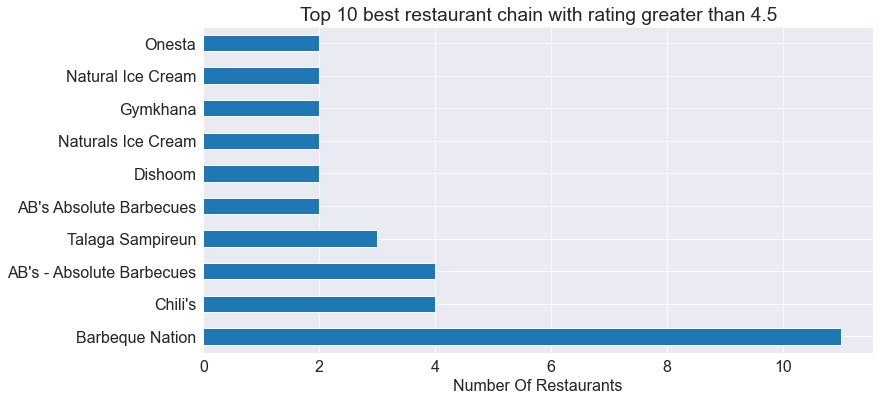

In [398]:
final_df[final_df['Aggregate rating']>=4.5]["Restaurant Name"].value_counts().nlargest(10).plot(kind = 'barh')
plt.xlabel("Number Of Restaurants")
plt.title("Top 10 best restaurant chain with rating greater than 4.5")

Text(0.5, 1.0, 'Restaurant chain with poor rating')

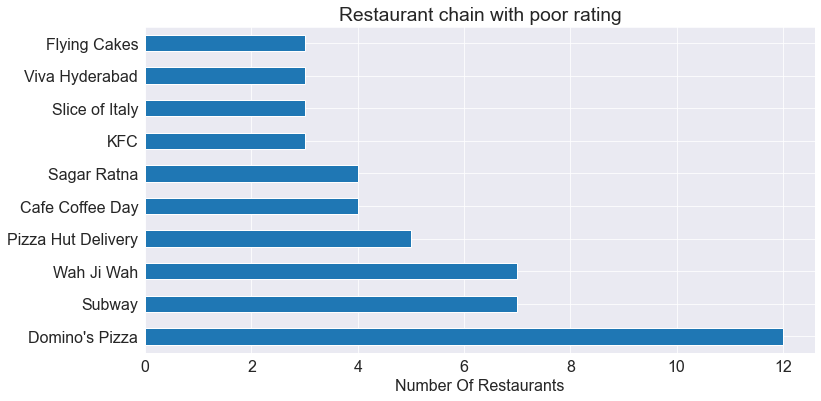

In [404]:
final_df[final_df['Rating text'] == 'Poor']["Restaurant Name"].value_counts().nlargest(10).plot(kind = 'barh')
plt.xlabel("Number Of Restaurants")
plt.title("Restaurant chain with poor rating")

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Cafe Coffee Day has over 80 cafes across the world that are listed in Zomato. 
- Barbeque Nation is the best rated restaurant chain
- Restaurant chains Domino's Pizza and Subway are rated poor the highest

</div>

In [402]:
# restaurants with outlets
# outlet count per city

final_df.groupby('City')['Restaurant Name'].value_counts().sort_values(ascending= False)[:30]

City       Restaurant Name     
New Delhi  Cafe Coffee Day         57
           Domino's Pizza          55
           Subway                  38
           Green Chick Chop        37
           McDonald's              33
           Giani                   24
           Keventers               24
           Giani's                 17
           Aggarwal Sweets         14
           Wah Ji Wah              14
           Baskin Robbins          13
           Pizza Hut Delivery      13
           Sagar Ratna             13
           Twenty Four Seven       13
Noida      Cafe Coffee Day         13
New Delhi  Republic of Chicken     13
           34, Chowringhee Lane    12
           Pizza Hut               12
           Bikaner Sweets          11
           Bikanervala             11
           Haldiram's              11
           Moti Mahal Delux        11
Noida      Domino's Pizza          11
           Subway                  11
Gurgaon    Cafe Coffee Day         11
           Subway 

<div class="alert alert-block alert-success">
<b>Observation:</b> 

-  Cafe Coffee Day, Domino's Pizza, Subway, Green Chick Chop and McDonald's have more than 30 outlets in New Delhi

</div>

### Understanding the Rating aggregate, color and text columns

In [286]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [287]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns= {0:"Rating count"})

In [288]:
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Rating between 4.5 and 5, the food was rated "Excellent"
- Rating between 4.0 and 4.4, the food was rated "Very Good"
- Rating between 3.5 and 3.9, the food was rated "Good"
- Rating between 2.5 and 3.4, the food was rated "Average"
- Rating between 1.8 and 2.4, the food was rated "Poor"
- 2148 restaurants were not rated at all
- No restaurants were rated 5

</div>

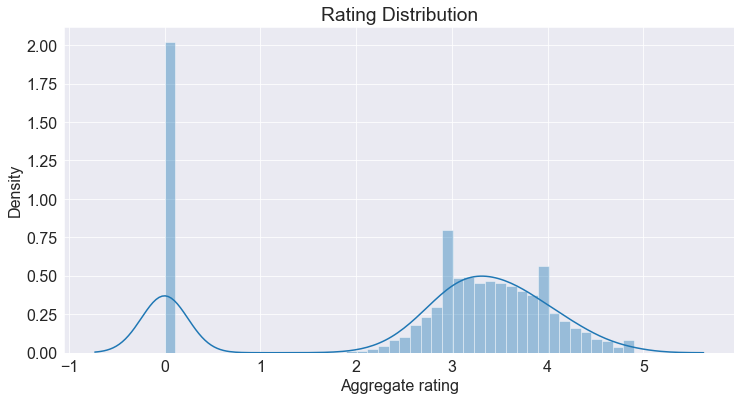

In [289]:
sns.distplot(final_df['Aggregate rating'])
plt.title('Rating Distribution')
plt.show()

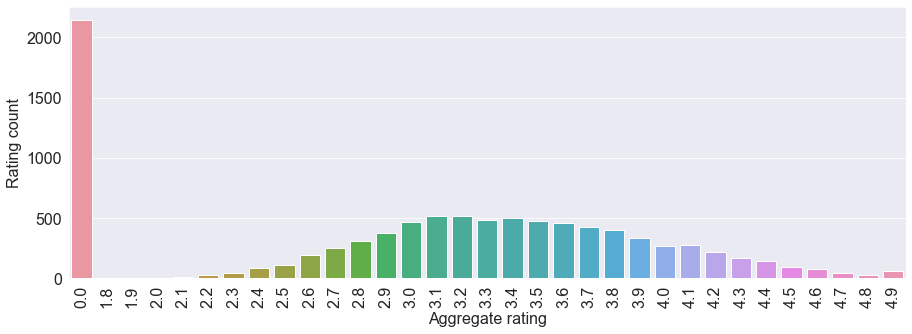

In [290]:
plt.figure(figsize=(15,5))
sns.barplot(data=ratings, x="Aggregate rating", y="Rating count" )
plt.xticks(rotation=90)
plt.show()

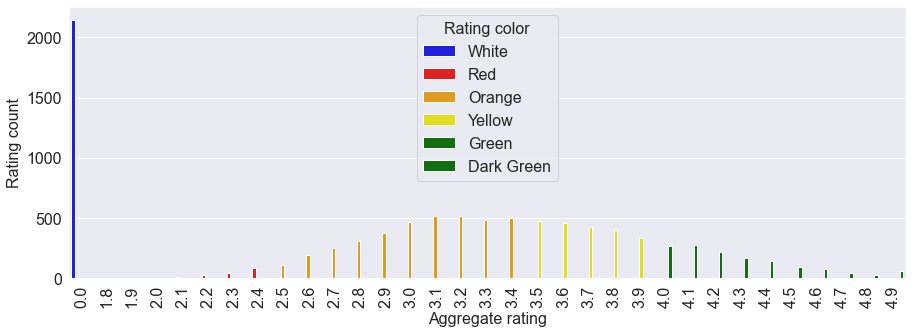

In [291]:
plt.figure(figsize=(15,5))
sns.barplot(data=ratings, x="Aggregate rating", y="Rating count", hue="Rating color", palette=["blue","red","orange","yellow","green","green"])
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Maximum ratings lie between 2.9 and 3.9
- It nearly follows a normal distribution 

</div>

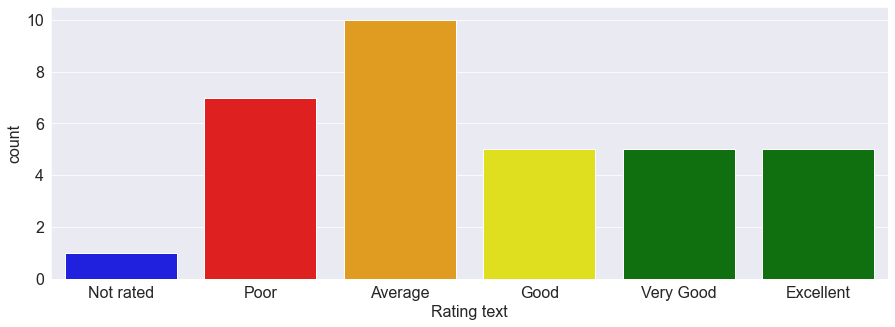

In [292]:
plt.figure(figsize=(15,5))
sns.countplot(data=ratings, x="Rating text", palette=["blue","red","orange","yellow","green","green"])
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Number of restaurants that are rated "Average" is highest followed by "Poor" rating
- Restaurants that were rated "Good", "Very Good" and "Excellent" almost have the same counts.

</div>

In [293]:
# countries with 0 ratings

final_df[final_df["Aggregate rating"]==0]["Country"].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [294]:
final_df[final_df["Aggregate rating"]==0].groupby("Country").size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- India has the most number of unrated restaurants.
- Most of the restaurants may have been unrated as cutsomers prefer dining-in instead of ordering online.
- Except India, Brazil, United States and United Kingdom, all other countries' restaurants were rated
</div>

In [327]:
# Top 5 countries that have high number of good ratings

final_df[final_df['Rating text'] == 'Excellent'].groupby('Country').size().reset_index().rename(columns={0: 'Counts'}).sort_values('Counts', ascending=False).head()

,Country,Counts
2,India,116
12,United States,68
11,United Kingdom,23
10,UAE,18
1,Brazil,16


In [328]:
final_df[final_df['Rating text'] == 'Very Good'].groupby('Country').size().reset_index().rename(columns={0: 'Counts'}).sort_values('Counts', ascending=False).head()

,Country,Counts
3,India,692
14,United States,179
9,South Africa,35
12,UAE,31
13,United Kingdom,31


In [329]:
final_df[final_df['Rating text'] == 'Good'].groupby('Country').size().reset_index().rename(columns={0: 'Counts'}).sort_values('Counts', ascending=False).head()

,Country,Counts
3,India,1847
14,United States,159
13,United Kingdom,20
0,Australia,13
9,South Africa,12


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- 116 restaurants in India were rated as Excellent. India also has the highest counts in restaurants that were rated Very good and Good.
- Other than India, United States and United Kingdom all other countries have less than 20 restaurants rated as Excellent
- India, Unites States, United Kingdom, UAE and South Africe have many restaurants with good ratings

</div>

In [330]:
final_df[final_df['Rating text'] == 'Poor'].groupby('Country').size().reset_index().rename(columns={0: 'Counts'})

,Country,Counts
0,Australia,1
1,India,180
2,New Zealand,1
3,Sri Lanka,1
4,UAE,1
5,United States,2


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Totally 186 restaurants were rated poor. Out of which 180 restaurants are from India
- United Kingdom has third most number of restaurants, but none of them were rated poor

</div>

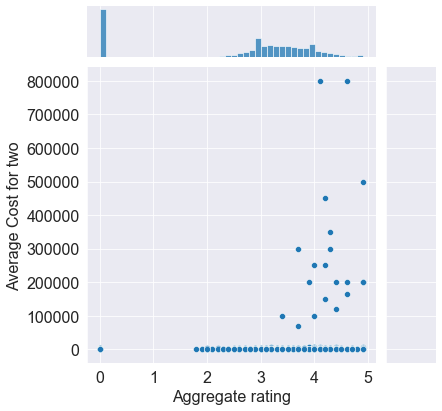

In [295]:
# cost for two v/s restaurant rating

sns.jointplot(data=final_df, x="Aggregate rating", y="Average Cost for two")

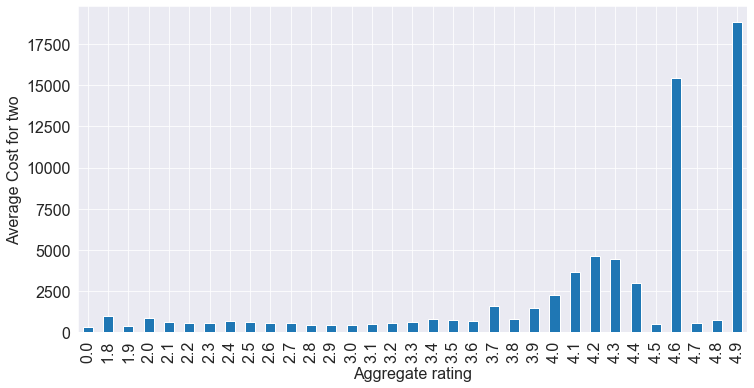

In [414]:
final_df.groupby('Aggregate rating')['Average Cost for two'].mean().plot(kind='bar')
plt.ylabel('Average Cost for two')
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Average cost for two is high when restaurants have 4.6 and 4.9 ratings
- Average cost for two does not impact ratings as higher rating is provided irrespective of the cost

</div>

<AxesSubplot:xlabel='Aggregate rating'>

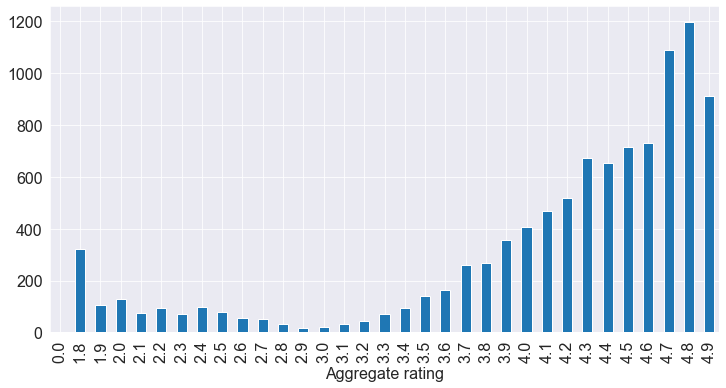

In [296]:
final_df.groupby("Aggregate rating")["Votes"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Rating text'>

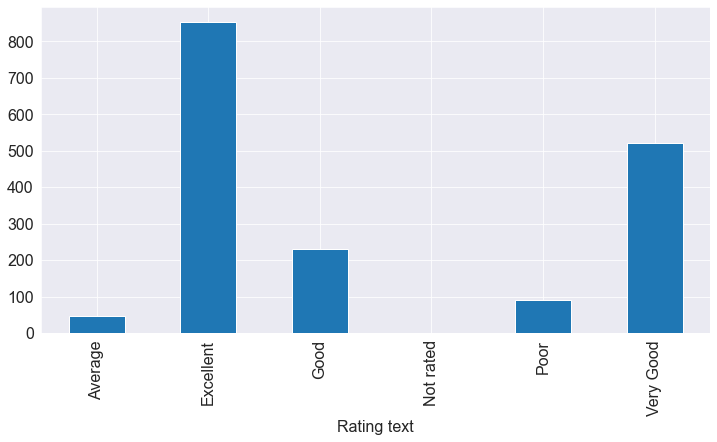

In [415]:
final_df.groupby("Rating text")["Votes"].mean().plot(kind="bar")

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Restaurants which are rated good, very good and excellent have higher number of votes.
- Restaurants which are rated average and poor have lower number of votes

</div>

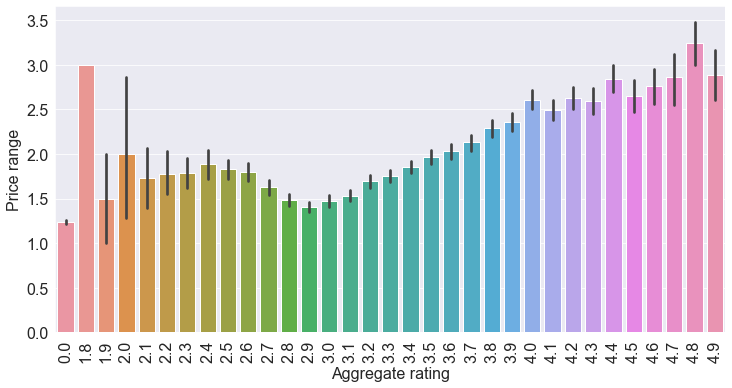

In [297]:
# price range and restaurant rating

sns.barplot(data=final_df, x="Aggregate rating", y="Price range")
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- There is a linear trend in rating versus price range after 2.9 rating. As price increases, the ratings increase.

</div>

<AxesSubplot:xlabel='Has Table booking'>

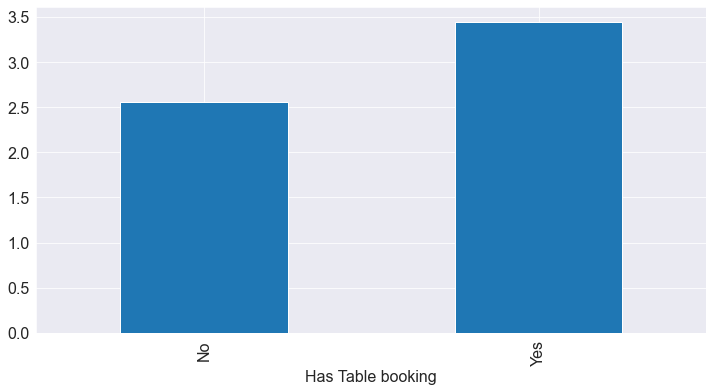

In [298]:
# differences in the rating of restaurants with and without table reservations?

final_df.groupby("Has Table booking")['Aggregate rating'].mean().plot(kind='bar')

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Restaurants have higher ratings when table booking at the restaurant is available

</div>

In [299]:
final_df["Cuisine Count"] = final_df["Cuisines"].apply(lambda x:len(x.split()))

In [300]:
final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cuisine Count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,4


In [301]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'Cuisine Count'],
      dtype='object')

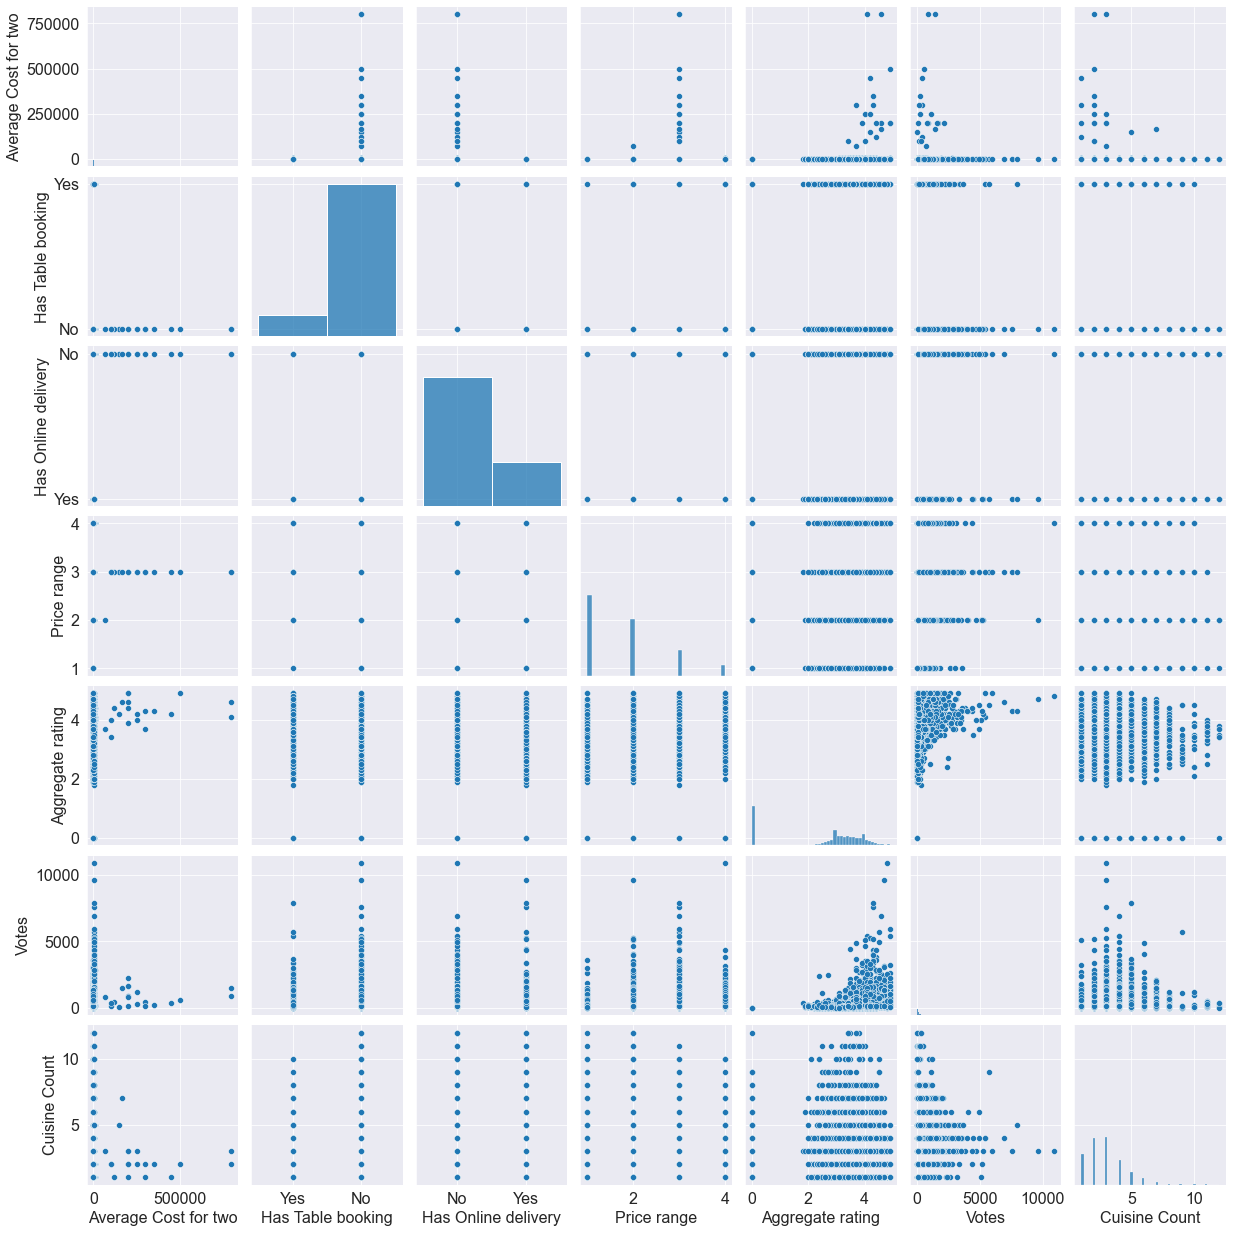

In [302]:
sns.pairplot(data=final_df, vars=['Average Cost for two','Has Table booking','Has Online delivery','Price range', 'Aggregate rating', 'Votes', 'Cuisine Count'])

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Average Cost for two and Cuisine Count have inverse relationship.
- Votes received for expensive restaurants are fewer in numbers. Very few customers frequent expensive restaurants and prefer the ones that are cheaper.
- Higher the cost, higher the ratings
- Price range 3 has more variety of average cost for two.
- Price range of 1 and 2 have more cusines count
- Price range of 3 have higher number of  votes than the other price range.
- Higher the rating, higher the votes received
- Lower the cuisine count, higher the votes received

</div>

<AxesSubplot:>

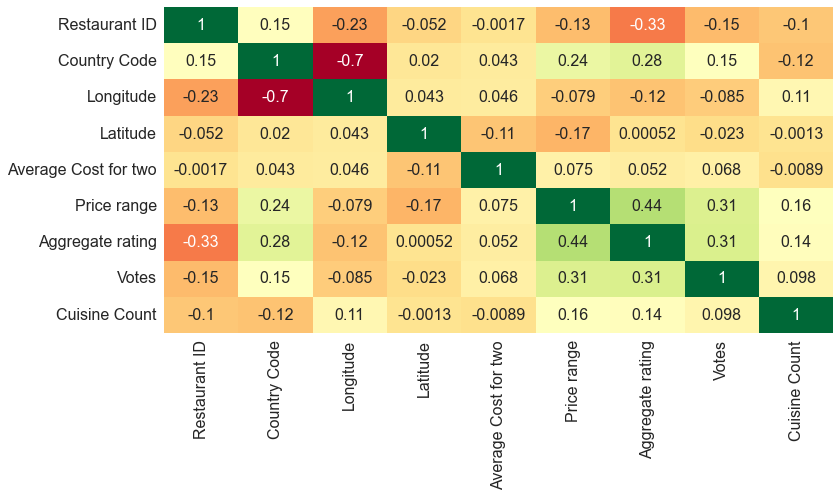

In [306]:
sns.heatmap(final_df.corr(), annot=True,cbar=False, cmap='RdYlGn')

In [332]:
# Cuisines are comma seperated, splitting them

final_df["Cuisine"] = df["Cuisines"].str.split(", ")
final_df = final_df.explode("Cuisine")
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Cuisine Count,Cuisine
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,3,French
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,3,Japanese
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,3,Desserts
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,1,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,4,4.4,Green,Very Good,270,Phillipines,4,Seafood


In [333]:
# top 5 Cuisines
final_df["Cuisine"].value_counts().head()

North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: Cuisine, dtype: int64

In [334]:
# top 5 cuisines with Excellent rating

final_df[final_df['Rating text'] =="Excellent"]["Cuisine"].value_counts().head()

North Indian    47
American        44
Italian         38
Cafe            38
Desserts        31
Name: Cuisine, dtype: int64

In [335]:
# top 5 cuisines with Excellent and Very Good rating

final_df[final_df['Rating text'].isin(["Excellent", "Very Good"])]["Cuisine"].value_counts().head()

North Indian    323
Italian         264
Continental     223
Chinese         222
Cafe            201
Name: Cuisine, dtype: int64

In [336]:
# top 5 cuisines with Poor rating

final_df[final_df['Rating text'] =="Poor"]["Cuisine"].value_counts().head()

North Indian    96
Chinese         78
Fast Food       63
Mughlai         28
Pizza           27
Name: Cuisine, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

    
- Restaurants which provide North Indian, Chinese and Fast Food were rated Poor.
- Restaurants which provide North Indian, American and Italian were rated Excellent.
- North Indian cuisine features on all three lists at the top. 

</div>

In [76]:
# top 5 rated cuisines

final_df.groupby("Cuisine")["Aggregate rating"].mean().sort_values(ascending=False).head()

Cuisine
Sunda        4.900000
Bí_rek       4.700000
Taiwanese    4.650000
Ramen        4.500000
Dim Sum      4.466667
Name: Aggregate rating, dtype: float64

In [77]:
# Restaurant count of each cuisines per country

final_df.groupby(["Country","Cuisine"]).size().reset_index().rename(columns={0:"Count"}).sort_values(by='Count', ascending=False).head()

,Country,Cuisine,Count
121,India,North Indian,3946
79,India,Chinese,2690
86,India,Fast Food,1963
117,India,Mughlai,992
66,India,Bakery,726


In [78]:
temp = final_df.groupby(["Country","Cuisine"])["Restaurant ID"].size().reset_index().sort_values(by='Restaurant ID', ascending=False)

In [79]:
# Popular cuisines in US

temp[temp["Country"]=="United States"].head()

,Country,Cuisine,Restaurant ID
410,United States,American,112
453,United States,Seafood,59
420,United States,Burger,49
449,United States,Pizza,49
452,United States,Sandwich,49


In [80]:
# Popular cuisines in India

temp[temp["Country"]=="India"].head()

,Country,Cuisine,Restaurant ID
121,India,North Indian,3946
79,India,Chinese,2690
86,India,Fast Food,1963
117,India,Mughlai,992
66,India,Bakery,726


In [81]:
# Popular cuisines in UK

temp[temp["Country"]=="United Kingdom"].head()

,Country,Cuisine,Restaurant ID
390,United Kingdom,Indian,17
377,United Kingdom,Cafe,12
375,United Kingdom,British,12
371,United Kingdom,American,11
391,United Kingdom,Italian,9


In [82]:
temp.groupby(["Country"])["Restaurant ID"].max()

Country
Australia           11
Brazil              26
Canada               1
India             3946
Indonesia            9
New Zealand         14
Phillipines          8
Qatar                7
Singapore            5
South Africa        15
Sri Lanka            6
Turkey              10
UAE                 25
United Kingdom      17
United States      112
Name: Restaurant ID, dtype: int64

In [83]:
temp.groupby(["Country"]).agg({"Restaurant ID" : np.max})

,Restaurant ID
Country,
Australia,11
Brazil,26
Canada,1
India,3946
Indonesia,9
New Zealand,14
Phillipines,8
Qatar,7
Singapore,5


In [85]:
final_df.groupby("Restaurant ID")["Cuisine"].count()

Restaurant ID
53          3
55          2
60          2
64          1
65          3
           ..
18499493    2
18500618    2
18500628    3
18500639    2
18500652    1
Name: Cuisine, Length: 9551, dtype: int64

In [86]:
final_df["Cuisine Count"].value_counts()

3     5680
4     3907
2     3440
5     2330
1     1679
6     1477
7      590
8      218
11     127
9      115
10      92
12      64
Name: Cuisine Count, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Most retaurants seem to offer 2-4 types of cusinies.

</div>

In [92]:
final_df.groupby(["Country", "Cuisines"])["Cuisine Count"].size().reset_index()

,Country,Cuisines,Cuisine Count
0,Australia,Asian,1
1,Australia,Australian,1
2,Australia,"Bar Food, Modern Australian",2
3,Australia,"Bar Food, Steak",2
4,Australia,"Breakfast, Coffee and Tea",4
...,...,...,...
1983,United States,"Sushi, Teriyaki",2
1984,United States,"Sushi, Thai",2
1985,United States,Tapas,1
1986,United States,Thai,6


In [994]:
final_df.groupby("Country")["Cuisine Count"].agg([np.min, np.max, np.mean])

,amin,amax,mean
Country,,,
Australia,1,6,3.897959
Brazil,1,5,2.380000
Canada,1,3,2.250000
India,1,12,3.715414
Indonesia,1,7,2.957447
New Zealand,1,9,2.869565
Phillipines,1,4,3.055556
Qatar,1,5,2.545455
Singapore,1,5,3.431373


In [1010]:
final_df[final_df["Cuisine Count"] >10].groupby("Country").size()

Country
India    191
dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Few restaurants in India & South Africa offer >9 cuisines
- Significant number of restaurants in India offer more than 10 cuisines

</div>

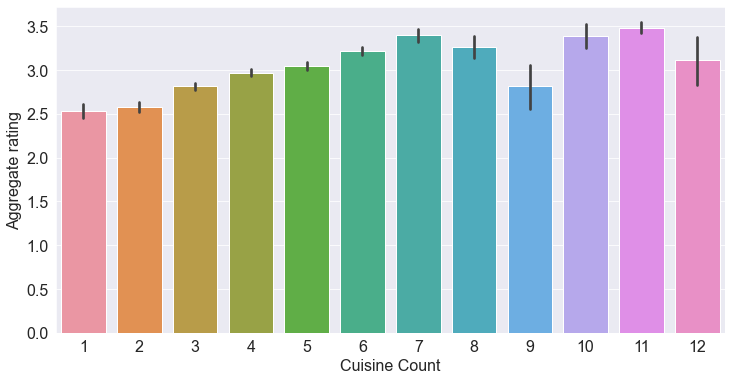

In [1016]:
sns.barplot(data=final_df, x="Cuisine Count", y="Aggregate rating")
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Higher number of cuisines available in the restaurant, higher is the restaurant rating.
- The rating is lower when restaurants have 8,9,12 ratings

</div>